**Introduction**

This notebook shows how to build a Support Vector Machine for classification. Library routines are used, that solve the optimization problem which emerges in the dual formulation of the support vector machine. The code structures the data, so that the library routine can find the maximal-margin solution, and transforms this solution into a classifier which can process new data.

In [115]:
# !pip install texttable

In [116]:
#@title Libraries
import numpy as np, random , math
from scipy.optimize import minimize
import matplotlib.pyplot as plt
from texttable import Texttable

In [117]:
#@title Functions: Create samples
def createSamples():
  classA = np.concatenate((np.random.randn(samplesA[0],2)*spreadA[0]+areaA[0],\
                          np.random.randn(samplesA[1],2)*spreadA[1]+areaA[1]))
  classB = np.random.randn(sampleB,2)*spreadB+areaB

  inputs = np.concatenate((classA, classB))
  targets = np.concatenate((np.ones(classA.shape[0]),\
                            -np.ones(classB.shape[0])))
  N = inputs.shape[0] #number of rows (samples)

  #Next, we need to reorder the samples, later we will move the clusters around
  permute = list (range(N))
  random.shuffle(permute)
  inputs = inputs[permute, :]
  targets = targets[permute]
  return targets, inputs, N, classA, classB

In [118]:
#@title Functions
#title Functions: Calculations & Kernels
def zerofun(alpha): # will be used for minimizing
  C = np.dot(np.transpose(alpha), targets) # this is the constraint defined in (10)
  return C
  
# Kernel
def K(x, y):
  if kernel == 'linear':
    k = np.dot(x, y) 
    
  elif kernel == 'polynomial':
    k = pow((np.dot(x, y) + 1), polynomial)

  elif kernel == 'radialbasis':
    k = math.exp(- pow(np.linalg.norm(x - y), 2) / \
             (2 * pow(sigma, 2)))
  return k

# (4) used when minimizing; it receives the vector alpha as a parameter and returns a scalar value 
def calc_P():
    P = np.zeros((N, N))
    for i in range(N):
        for j in range(N):
            P[i][j] = targets[i]*targets[j]*K(inputs[i], inputs[j])
    return P

def objective(alpha):
    return 0.5*np.dot(np.dot(np.transpose(alpha), P), alpha) - np.sum(alpha)

def b(): #formula (7) calculate the bias
  bias = sum(runThese['alpha'][i] * runThese['targets'][i] * K(runThese['inputs'][0], runThese['inputs'][i]) \
             for i in range(len(runThese['alpha']))) - runThese['targets'][0]
  return bias

def indicator(s): #formula (6) 
    ind = sum(runThese['alpha'][i] * runThese['targets'][i] * K(s, runThese['inputs'][i]) \
              for i in range(len(runThese['alpha']))) - b()
    return ind    

In [119]:
#@title Functions: Plots
def plot(title):
  fig, ax = plt.subplots(figsize=(7, 6))

  ax.set_title(title)

  ax.plot([p[0] for p in classA],[p[1] for p in classA],'b.', label='ClassB')
  ax.plot([p[0] for p in classB],[p[1] for p in classB],'r.', label='ClassA')

  #add X:s to the support vectors of the two classes
  SV_Inputs = [x for x in runThese['inputs'] if x in classA]
  ax.plot([p[0] for p in SV_Inputs], [p[1] for p in SV_Inputs], 'bx', label='SV ClassB',  markersize=10)
  SV_Inputs = [x for x in runThese['inputs'] if x in classB]
  ax.plot([p[0] for p in SV_Inputs], [p[1] for p in SV_Inputs], 'rx', label='SV ClassA',  markersize=10)

  xgrid = np.linspace(-5,5)
  ygrid = np.linspace(-4,4)

  grid = np.array([[indicator([x, y]) \
                      for x in xgrid] \
                      for y in ygrid])

  ax.contour(xgrid, ygrid, grid, \
              (-1.0,0.0,1.0), \
              colors=('red','black','blue'),\
              linewidths=(0.5,1.5,0.5))

  ax.legend(bbox_to_anchor=(1.01, 0.9), loc=2)

  #plt.axis('equal') #Force same scale on both axes
  #plt.savefig('svmplot.pdf') #Save a copy in a file
  plt.show() #Show the plot on the screen

polynomial = 0
sigma = 0
def PlotTable():
      t = Texttable()
      dd = [] 
      dd.append(['CLASS', 'GROUPING', 'SPREAD', 'INTERVALL', 'SAMPLES'])
      dd.append(['A', '1',spreadA[0],areaA[0],samplesA[0]])
      dd.append(['A', '2',spreadA[1],areaA[1],samplesA[1]])
      dd.append(['B', '1',spreadB,areaB,sampleB])
      t.add_rows(dd)
      print("********************* TEST DATA *********************")
      print(t.draw())
      print(" ")       

      t = Texttable()
      dd = [] 
      dd.append(['TYPE', 'POLYNOMIAL', 'SIGMA', 'BOUNDS'])
      dd.append([kernel, polynomial,sigma,str(C)])
      t.add_rows(dd)
      print("**************** KERNEL ****************")
      print(t.draw())
      print(" ")        


In [120]:
#@title Tests: Moving the clusters around

############ TEST 1
# C = None #bounds; slack parameter
# spreadA = [0.2,0.2]
# areaA = [[1.5,0.5], [-1.5,0.5]]
# samplesA = [10,10]

# spreadB = 0.2
# areaB =[0.0,-0.5]
# sampleB = 20

# kernel = 'linear' #linear, polynomial, radialbasis
#polynomial = 2 #applicable only for polynomial kernel
#sigma = 1 #applicable only for radialbasis

# ############ TEST 2
# C = None #bounds; slack parameter
# spreadA = [0.2,0.2]
# areaA = [[1.5,0.5], [-1.5,0.5]]
# samplesA = [10,10]

# spreadB = 0.2
# areaB =[0.0,-1.0]
# sampleB = 20

# kernel = 'linear' #linear, polynomial, radialbasis
# polynomial = 1 #applicable only for polynomial kernel
# sigma = 1 #applicable only for radialbasis

# ############TEST 3
# C = None #bounds; slack parameter
# spreadA = [0.2,0.2]
# areaA = [[1.5,0.5], [-1.5,0.5]]
# samplesA = [10,10]

# spreadB = 0.2
# areaB =[0.0,1.0]
# sampleB = 20

# kernel = 'linear' #linear, polynomial, radialbasis
# polynomial = 1 #applicable only for polynomial kernel
# sigma = 1 #applicable only for radialbasis


In [121]:
#@title Tests: Non-linear kernals with difficult data sets

# ############ TEST 1
C = None #bounds; slack parameter
spreadA = [0.3,0.3]
areaA = [[1.0,2.0], [-2.0,-1.0]]
samplesA = [15,15]

spreadB = 0.3
areaB =[0.0, 1.0]
sampleB = 30

kernel = 'radialbasis' #linear, polynomial, radialbasis
polynomial = 1 #applicable only for polynomial kernel
sigma = 1 #applicable only for radialbasis

# # ############ TEST 2
# C = None #bounds; slack parameter
# spreadA = [0.3,0.3]
# areaA = [[1.0,2.0], [-2.0,-1.0]]
# samplesA = [15,15]

# spreadB = 0.3
# areaB =[0.0, 1.0]
# sampleB = 30

# kernel = 'radialbasis' #linear, polynomial, radialbasis
# polynomial = '' #applicable only for polynomial kernel
# sigma = 1 #applicable only for radialbasis


In [122]:
#@title Tests: The parameters of the non-linear kernals 
# ############ TEST 1
#C = None #bounds; slack parameter
#spreadA = [0.2,0.2]
#areaA = [[1.5,0.5], [-1.5,0.5]]
#samplesA = [10,10]

#spreadB = 0.2
#areaB =[0.0,-0.5]
#sampleB = 20

#kernel = 'polynomial' #linear, polynomial, radialbasis
#polynomial = 2 #applicable only for polynomial kernel
#sigma = 1 #applicable only for radialbasis

# ############ TEST 2
# C = None #bounds; slack parameter
# spreadA = [0.2,0.2]
# areaA = [[1.5,0.5], [-1.5,0.5]]
# samplesA = [10,10]

# spreadB = 0.2
# areaB =[0.0,-0.5]
# sampleB = 20

# kernel = 'polynomial' #linear, polynomial, radialbasis
# polynomial = 10 #applicable only for polynomial kernel
# sigma = 1 #applicable only for radialbasis

# ############ TEST 3
# C = None #bounds; slack parameter
# spreadA = [0.2,0.2]
# areaA = [[1.5,0.5], [-1.5,0.5]]
# samplesA = [10,10]

# spreadB = 0.2
# areaB =[0.0,-0.5]
# sampleB = 20

# kernel = 'radialbasis' #linear, polynomial, radialbasis
# polynomial = '' #applicable only for polynomial kernel
# sigma = 0.5 #applicable only for radialbasis

# ############ TEST 4
# C = None #bounds; slack parameter
# spreadA = [0.2,0.2]
# areaA = [[1.5,0.5], [-1.5,0.5]]
# samplesA = [10,10]

# spreadB = 0.2
# areaB =[0.0,-0.5]
# sampleB = 20

# kernel = 'radialbasis' #linear, polynomial, radialbasis
# polynomial = '' #applicable only for polynomial kernel
# sigma = 1.5 #applicable only for radialbasis

In [123]:
#@title Tests: Explore the role of the slack parameter C
# ############ TEST 1
# C = None #bounds; slack parameter
# spreadA = [0.5,0.5]
# areaA = [[-1.5,0.5], [1.0,0.5]]
# samplesA = [15,15]

# spreadB = 0.5
# areaB =[0.0, -0.5]
# sampleB = 30

# kernel = 'polynomial' #linear, polynomial, radialbasis
# polynomial = 3 #applicable only for polynomial kernel
# sigma = '' #applicable only for radialbasis

# ############ TEST 2
# C = 10 #bounds; slack parameter
# spreadA = [0.5,0.5]
# areaA = [[-1.5,0.5], [1.0,0.5]]
# samplesA = [15,15]

# spreadB = 0.5
# areaB =[0.0, -0.5]
# sampleB = 30

# kernel = 'polynomial' #linear, polynomial, radialbasis
# polynomial = 3 #applicable only for polynomial kernel
# sigma = '' #applicable only for radialbasis

# ############ TEST 3
# C = 100 #bounds; slack parameter
# spreadA = [0.5,0.5]
# areaA = [[-1.5,0.5], [1.0,0.5]]
# samplesA = [15,15]

# spreadB = 0.5
# areaB =[0.0, -0.5]
# sampleB = 30

# kernel = 'polynomial' #linear, polynomial, radialbasis
# polynomial = 3 #applicable only for polynomial kernel
# sigma = '' #applicable only for radialbasis

In [124]:
#@title Tests: Explore the role of the slack parameter C
# ############ TEST 1
# C = 100 #bounds; slack parameter
# spreadA = [0.4,0.4]
# areaA = [[1.5,0.5], [-1.5,0.5]]
# samplesA = [15,15]

# spreadB = 0.4
# areaB =[1.5, 0.2]
# sampleB = 30

# kernel = 'linear' #linear, polynomial, radialbasis
# polynomial = '' #applicable only for polynomial kernel
# sigma = '' #applicable only for radialbasis

# # ############ TEST 2
#C = None #bounds; slack parameter
#spreadA = [0.4,0.4]
#areaA = [[1.5,0.5], [-1.5,0.5]]
#samplesA = [15,15]

#spreadB = 0.4
#areaB =[1.5, 0.2]
#sampleB = 30

#kernel = 'polynomial' #linear, polynomial, radialbasis
#polynomial = 3 #applicable only for polynomial kernel
# sigma = '' #applicable only for radialbasis

Optimization is success: True


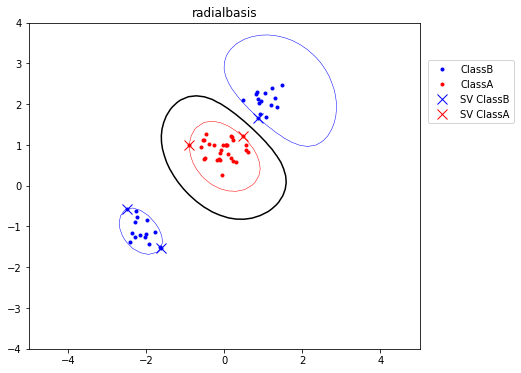

********************* TEST DATA *********************
+-------+----------+--------+--------------+---------+
| CLASS | GROUPING | SPREAD |  INTERVALL   | SAMPLES |
+=======+==========+========+==============+=========+
| A     | 1        | 0.300  | [1.0, 2.0]   | 15      |
+-------+----------+--------+--------------+---------+
| A     | 2        | 0.300  | [-2.0, -1.0] | 15      |
+-------+----------+--------+--------------+---------+
| B     | 1        | 0.300  | [0.0, 1.0]   | 30      |
+-------+----------+--------+--------------+---------+
 
**************** KERNEL ****************
+-------------+------------+-------+--------+
|    TYPE     | POLYNOMIAL | SIGMA | BOUNDS |
+=============+============+=======+========+
| radialbasis | 1          | 1     | None   |
+-------------+------------+-------+--------+
 


In [125]:
#@title Code: Main
np.random.seed(100) #set seed to reproduce result
targets, inputs, N, classA, classB = createSamples()

#Initialize a guess of the alpha vector
start = np.zeros(N) #N is here the number of training samples
#each training sample will be a corresponding alpha-value

#set bounds of alpha so that 0 <= alpha <= C
bounds=[(0, C) for b in range(N)]
XC = {'type': 'eq', 'fun': zerofun} # used to impose other constraints in addition to bounds

P = calc_P()
ret = minimize(objective, start, bounds = bounds, constraints = XC)

print("Optimization is success: " + str(ret.success))

alpha = ret['x']   

#next we need to extract non-zero values
alpha = np.array([round(a, 5) for a in alpha])  # Round to zero on the fifth decimal, important

runThese = {'alpha': [], 'inputs': [], 'targets': []}

#Now, save the svm-points
for i in range(N):
    if alpha[i]!=0: #where they are 0 since we zero.d the others out
        runThese['alpha'].append(alpha[i])
        runThese['inputs'].append(inputs[i])
        runThese['targets'].append(targets[i])
plot(kernel)
PlotTable()